In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('chi2.csv')

In [ ]:
df.head()

,Age_Group,Smoker,Exercise_Level,Diet_Quality,Alcohol_Consumption,Family_History,Has_Lung_Disease
0,36-45,Yes,High,Good,NaN,No,Yes
1,46-60,No,High,Good,Moderate,Yes,Yes
2,18-25,No,Low,Average,NaN,Yes,No
3,36-45,No,Low,Good,Heavy,Yes,Yes
4,36-45,No,Medium,Good,Heavy,No,Yes


In [ ]:
df['Age_Group'].unique()

array(['36-45', '46-60', '18-25', '26-35'], dtype=object)

In [ ]:
df.columns

Index(['Age_Group', 'Smoker', 'Exercise_Level', 'Diet_Quality',
       'Alcohol_Consumption', 'Family_History', 'Has_Lung_Disease'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Age_Group            100 non-null    object
 1   Smoker               100 non-null    object
 2   Exercise_Level       100 non-null    object
 3   Diet_Quality         100 non-null    object
 4   Alcohol_Consumption  72 non-null     object
 5   Family_History       100 non-null    object
 6   Has_Lung_Disease     100 non-null    object
dtypes: object(7)
memory usage: 5.6+ KB


In [ ]:
for i in df.columns:
  print(f"Unique values in {i}: {df[i].unique()}")

Unique values in Age_Group: ['36-45' '46-60' '18-25' '26-35']
Unique values in Smoker: ['Yes' 'No']
Unique values in Exercise_Level: ['High' 'Low' 'Medium']
Unique values in Diet_Quality: ['Good' 'Average' 'Poor']
Unique values in Alcohol_Consumption: [nan 'Moderate' 'Heavy']
Unique values in Family_History: ['No' 'Yes']
Unique values in Has_Lung_Disease: ['Yes' 'No']


In [ ]:
age_map = {
    '18-25': 0,
    '26-35': 1,
    '36-45': 2,
    '46-60': 3
}
df['Age_Group'] = df['Age_Group'].map(age_map)


In [ ]:
from sklearn.preprocessing import OrdinalEncoder

In [ ]:
import numpy as np
from sklearn.preprocessing import OrdinalEncoder

df['Alcohol_Consumption'] = df['Alcohol_Consumption'].fillna('Missing')
# Ensure columns are strings (object dtype)
ordinal_columns = ['Exercise_Level', 'Diet_Quality', 'Alcohol_Consumption']

for col in ordinal_columns:
    df[col] = df[col].astype(str)

ordinal_categories = [
    ['Low','Medium','High'],                  # Exercise_Level
    ['Poor','Average','Good'],                # Diet_Quality
    ['Moderate', 'Heavy', 'Missing']             # Alcohol_Consumption
]

# Use dtype=float to handle NaNs, or set encoded_missing_value to an int (like -1)
encoder = OrdinalEncoder(categories=ordinal_categories)  # or use dtype=int, encoded_missing_value=-1

ordinal_data = encoder.fit_transform(df[ordinal_columns])
df[ordinal_columns] = ordinal_data

yes_no_cols = ['Smoker', 'Family_History', 'Has_Lung_Disease']
for col in yes_no_cols:
    df[col] = df[col].map({'Yes': 1, 'No': 0})

print(df.head())


   Age_Group  Smoker  Exercise_Level  Diet_Quality  Alcohol_Consumption  \
0          2       1             2.0           2.0                  2.0   
1          3       0             2.0           2.0                  0.0   
2          0       0             0.0           1.0                  2.0   
3          2       0             0.0           2.0                  1.0   
4          2       0             1.0           2.0                  1.0   

   Family_History  Has_Lung_Disease  
0               0                 1  
1               1                 1  
2               1                 0  
3               1                 1  
4               0                 1  


In [ ]:
x = df.drop(columns=['Has_Lung_Disease'])
y = df['Has_Lung_Disease']

# Univariate Feature Selection Techniques

## Chi-square Method : Categorical input and Categorical Output

In [ ]:
#Importing
from sklearn.feature_selection import SelectKBest, chi2

In [ ]:
chi_scores, p_values = chi2(x, y)
chi_scores

array([0.19959614, 0.19492115, 0.00428438, 2.21597673, 0.15438494,
       0.12987013])

In [ ]:
chi2_df = pd.DataFrame({'Columns': x.columns,
              'Calculated Chi^2 Values':chi_scores})

In [ ]:
# Sort ascending (smallest to largest)
chi2_df.sort_values(by='Calculated Chi^2 Values', ascending=False)

,Columns,Calculated Chi^2 Values
3,Diet_Quality,2.215977
0,Age_Group,0.199596
1,Smoker,0.194921
4,Alcohol_Consumption,0.154385
5,Family_History,0.129870
2,Exercise_Level,0.004284


Using sklearn

In [ ]:
from sklearn.feature_selection import SelectKBest, chi2
import pandas as pd

# Assuming x = input features, y = target labels

# Apply Chi-Squared feature selection
chi_selector = SelectKBest(score_func=chi2, k=4)
x_kbest = chi_selector.fit_transform(x, y)

# Get the selected column names
selected_columns = x.columns[chi_selector.get_support()]

# Create a DataFrame with selected features
x_selected = pd.DataFrame(x_kbest, columns=selected_columns)

print("Selected top 4 features using Chi² test:")
print(selected_columns)


Selected top 4 features using Chi² test:
Index(['Age_Group', 'Smoker', 'Diet_Quality', 'Alcohol_Consumption'], dtype='object')


## ANOVA F-test: Numerical Input and Categorical Output

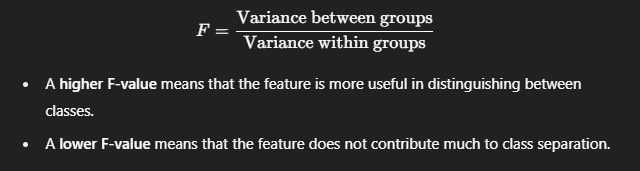

In [ ]:
anovaf_df = pd.read_csv('diabetes.csv')

In [ ]:
anovaf_df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [ ]:
x = anovaf_df.drop(columns=['Outcome'])
y = anovaf_df['Outcome']

In [ ]:
from sklearn.feature_selection import SelectKBest, f_classif
# Apply ANOVA F-test
f_test = SelectKBest(score_func=f_classif, k=4)  # Select top 4 features
X_selected = f_test.fit_transform(x, y)

# Show scores
f_scores = f_test.scores_
f_df = pd.DataFrame({'Feature': x.columns, 'F-Score': f_scores})
f_df.sort_values(by='F-Score', ascending=False)

,Feature,F-Score
1,Glucose,213.161752
5,BMI,71.772072
7,Age,46.140611
0,Pregnancies,39.670227
6,DiabetesPedigreeFunction,23.871300
4,Insulin,13.281108
3,SkinThickness,4.304381
2,BloodPressure,3.256950


In [ ]:
selected_columns = x.columns[f_test.get_support()]
print(selected_columns)


Index(['Pregnancies', 'Glucose', 'BMI', 'Age'], dtype='object')


##F-Statistic for Regression

In [ ]:
from sklearn.feature_selection import SelectKBest, f_regression

import pandas as pd

regression_df = pd.read_csv('regression.csv')
regression_df.head()

,Feature_1,Feature_2,Feature_3,Feature_4,Target
0,-0.075572,1.131629,0.488518,1.519817,241.657989
1,-0.200758,0.186561,-0.222328,0.410052,34.598535
2,0.550537,0.792807,-1.230058,-0.623531,-71.375391
3,0.137701,0.077821,0.529465,0.618380,100.008876
4,0.784771,-0.955425,0.417302,0.585910,29.482828


In [ ]:
x = regression_df.drop(columns=['Target'])
y = regression_df['Target']

In [ ]:
# Apply f_regression
f_selector = SelectKBest(score_func=f_regression, k=2)
x_selected = f_selector.fit_transform(x, y)

# Show F-scores and p-values
f_scores = f_selector.scores_
p_values = f_selector.pvalues_

# Create a summary DataFrame
f_df = pd.DataFrame({'Feature': x.columns, 'F-Score': f_scores, 'P-Value': p_values})
print(f_df.sort_values(by='F-Score', ascending=False))

     Feature     F-Score       P-Value
3  Feature_4  158.282891  3.548372e-22
1  Feature_2   34.530416  5.785259e-08
2  Feature_3   13.295834  4.281374e-04
0  Feature_1    0.000065  9.936056e-01


In [ ]:
selected_columns = x.columns[f_selector.get_support()]
print(selected_columns)


Index(['Feature_2', 'Feature_4'], dtype='object')


##r-regression method: Numerical inputs and numerical outputs

r = pearson's coefficient. It helps in understandning the linear relationship between the two columns/variables

In [ ]:
from sklearn.feature_selection import SelectKBest, r_regression

import pandas as pd

regression_df = pd.read_csv('regression.csv')

In [ ]:
x = regression_df.drop(columns=['Target'])
y = regression_df['Target']

In [ ]:
# Apply f_regression
r_selector = SelectKBest(score_func=r_regression, k=2)
x_selected = r_selector.fit_transform(x, y)

# Show F-scores and p-values
r_scores = r_selector.scores_

# Create a summary DataFrame
r_df = pd.DataFrame({'Feature': x.columns, 'r-value': r_scores})
print(r_df.sort_values(by='r-value', ascending=False))

     Feature   r-value
3  Feature_4  0.785882
1  Feature_2  0.510438
2  Feature_3  0.345635
0  Feature_1  0.000812


In [ ]:
selected_columns = x.columns[r_selector.get_support()]
print(selected_columns)


Index(['Feature_2', 'Feature_4'], dtype='object')


##Mutual Info Regression

In [ ]:
from sklearn.feature_selection import mutual_info_regression

import pandas as pd

regression_df = pd.read_csv('regression.csv')

In [ ]:
#mutual info scores calculation
mi_scores = mutual_info_regression(x,y)

# Create a summary DataFrame
r_df = pd.DataFrame({'Feature': x.columns, 'mi_scores': mi_scores})
print(r_df.sort_values(by='mi_scores', ascending=False))

     Feature  mi_scores
3  Feature_4   0.496617
1  Feature_2   0.111024
2  Feature_3   0.022457
0  Feature_1   0.007430


## Mutual Info Classification

In [ ]:
import pandas as pd
from sklearn.feature_selection import mutual_info_classif

#Loading the data
classif_df = pd.read_csv('diabetes.csv')
x = classif_df.drop(columns=['Outcome'])
y = classif_df['Outcome']

# Apply Mutual Information Classification
mi_scores = mutual_info_classif(x, y)

# Create DataFrame to show MI scores
mi_df = pd.DataFrame({'Feature': x.columns, 'MI Score': mi_scores})
mi_df = mi_df.sort_values(by='MI Score', ascending=False)

print(mi_df)


                    Feature  MI Score
1                   Glucose  0.116749
7                       Age  0.081025
5                       BMI  0.080960
0               Pregnancies  0.026443
4                   Insulin  0.022028
2             BloodPressure  0.021611
6  DiabetesPedigreeFunction  0.013766
3             SkinThickness  0.000000
